### Logistic函数
- Logistic函数公式

$$Logistic(z) = \frac{1}{1 + e^{-z}}$$

以下记 $a=Logistic(z)$。

- 导数

$$Logistic'(z) = a(1 - a)$$

- 输入值域

$$(-\infty, \infty)$$

- 输出值域

$$(0,1)$$

- 函数图像

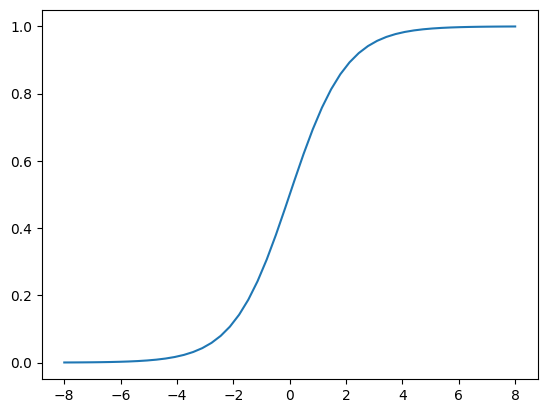

In [37]:
import numpy as np
import matplotlib.pyplot as plt
plot_x = np.linspace(-8,8)
plot_y = 1/(1+np.exp(-plot_x))
plt.plot(plot_x,plot_y)

此函数实际上是一个概率计算，它把 $(-\infty, \infty)$ 之间的任何数字都压缩到 $(0,1)$ 之间，返回一个概率值，这个概率值接近 $1$ 时，认为是正例，否则认为是负例。

训练时，一个样本 $x$ 在经过神经网络的最后一层的矩阵运算结果作为输入 $z$，经过Logistic计算后，输出一个 $(0,1)$ 之间的预测值。我们假设这个样本的标签值为 $0$ 属于负类，如果其预测值越接近 $0$，就越接近标签值，那么误差越小，反向传播的力度就越小。

推理时，我们预先设定一个阈值比如 $0.5$，则当推理结果大于 $0.5$ 时，认为是正类；小于 $0.5$ 时认为是负类；等于 $0.5$ 时，根据情况自己定义。阈值也不一定就是 $0.5$，也可以是 $0.65$ 等等，阈值越大，准确率越高，召回率越低；阈值越小则相反，准确度越低，召回率越高。

比如：

- input=2时，output=0.88，而0.88>0.5，算作正例
- input=-1时，output=0.27，而0.27<0.5，算作负例

### 6.1.4 对数几率的来历

经过数学推导后可以知道，神经网络实际也是在做这样一件事：经过调整 $w$ 和 $b$ 的值，把所有正例的样本都归纳到大于 $0.5$ 的范围内，所有负例都小于 $0.5$。但是如果只说大于或者小于，无法做准确的量化计算，所以用一个对率函数来模拟。

说到对率函数，还有一个问题，它为什么叫做“对数几率”函数呢？

我们举例说明：假设有一个硬币，抛出落地后，得到正面的概率是$0.5$，得到反面的概率是$0.5$。如果用正面的概率除以反面的概率，$0.5/0.5=1$，这个数值叫做$odds$，即几率。

泛化一下，如果正面的概率是 $a$，则反面的概率就是 $1-a$，则几率等于：

$$odds = \frac{a}{1-a} \tag{9}$$

上式中，如果 $a$ 是把样本 $x$ 的预测为正例的可能性，那么 $1-a$ 就是其负例的可能性，$\frac{a}{1-a}$就是正负例的比值，称为几率(odds)，它反映了 $x$作为正例的相对可能性，而对几率取对数就叫做对数几率(log odds, logit)。

假设概率如表6-3。

表6-3 概率到对数几率的对照表

|概率$a$|0|0.1|0.2|0.3|0.4|0.5|0.6|0.7|0.8|0.9|1|
|--|--|--|--|--|--|--|--|--|--|--|--|
|反概率$1-a$|1|0.9|0.8|0.7|0.6|0.5|0.4|0.3|0.2|0.1|0|
|几率 $odds$ |0|0.11|0.25|0.43|0.67|1|1.5|2.33|4|9|$\infty$|
|对数几率 $\ln(odds)$|N/A|-2.19|-1.38|-0.84|-0.4|0|0.4|0.84|1.38|2.19|N/A|

可以看到几率的值不是线性的，不利于分析问题，所以在表中第4行对几率取对数，可以得到一组成线性关系的值，并可以用直线方程来表示，即：

$$
\ln(odds) = \ln \frac{a}{1-a}= xw + b \tag{10}
$$

对公式10两边取自然指数：

$$
\frac{a}{1-a}=e^{xw+b} \tag{11}
$$

$$
a=\frac{1}{1+e^{-(xw+b)}}
$$

令$z=xw+b$：

$$
a=\frac{1}{1+e^{-z}} \tag{12}
$$

公式12就是公式2！对数几率的函数形式可以认为是这样得到的。

以上推导过程，实际上就是用线性回归模型的预测结果来逼近样本分类的对数几率。这就是为什么它叫做逻辑回归(logistic regression)，但其实是分类学习的方法。这种方法的优点如下：

- 把线性回归的成功经验引入到分类问题中，相当于对“分界线”的预测进行建模，而“分界线”在二维空间上是一条直线，这就不需要考虑具体样本的分布（比如在二维空间上的坐标位置），避免了假设分布不准确所带来的问题；
- 不仅预测出类别（0/1），而且得到了近似的概率值（比如0.31或0.86），这对许多需要利用概率辅助决策的任务很有用；
- 对率函数是任意阶可导的凸函数，有很好的数学性，许多数值优化算法都可以直接用于求取最优解。

我们改变$w$的值，看函数的图像变化：

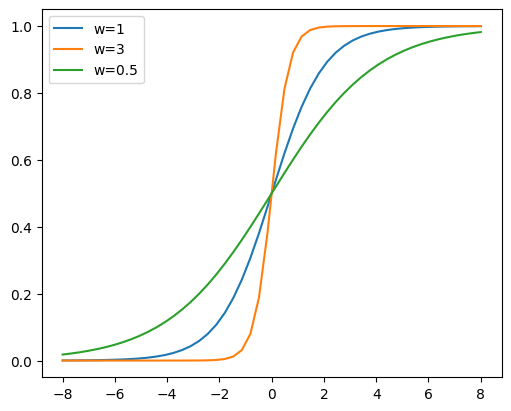

In [38]:
plot_x = np.linspace(-8,8)
fig, ax = plt.subplots(figsize=(5, 4), layout='constrained')
plot_y1 = 1/(1+np.exp(-1*plot_x))
plot_y2 = 1/(1+np.exp(-3*plot_x))
plot_y3 = 1/(1+np.exp(-0.5*plot_x))
ax.plot(plot_x,plot_y1, label='w=1')
ax.plot(plot_x,plot_y2, label='w=3')
ax.plot(plot_x,plot_y3, label='w=0.5')
ax.legend()

改变$b$的值，看函数的图像变化

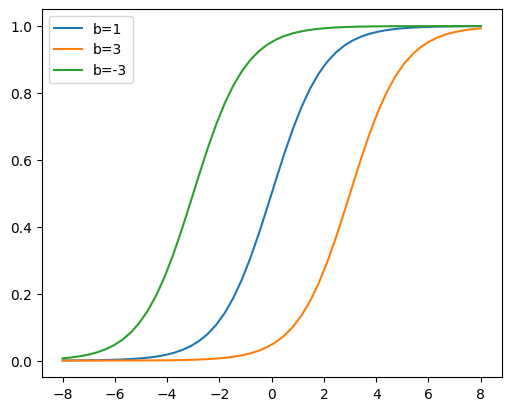

In [40]:
plot_x = np.linspace(-8,8)
fig, ax = plt.subplots(figsize=(5, 4), layout='constrained')
plot_y1 = 1/(1+np.exp(-plot_x))
plot_y2 = 1/(1+np.exp(-plot_x+3))
plot_y3 = 1/(1+np.exp(-plot_x-3))
ax.plot(plot_x,plot_y1, label='b=1')
ax.plot(plot_x,plot_y2, label='b=3')
ax.plot(plot_x,plot_y3, label='b=-3')
ax.legend()